In [1]:
import pandas as pd

df = pd.read_csv('twoalphas.csv')

df.head(5)

,sex,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf,phenotype
0,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.0,33.0,309.0,88.5,2.6,0.11,alpha trait
1,male,10.8,26.6,4.28,62.1,25.3,40.8,19.8,10.3,49.4,43.1,687.0,87.8,2.4,0.90,alpha trait
2,female,10.8,35.2,5.12,68.7,21.2,30.8,13.4,9.6,53.0,33.0,309.0,88.5,2.6,0.10,silent carrier
3,male,14.5,43.5,5.17,84.0,28.0,33.4,12.1,11.9,31.0,50.0,334.0,86.8,2.8,0.30,silent carrier
4,male,11.5,34.4,5.02,68.7,22.9,33.4,15.7,20.4,67.0,30.0,596.0,86.3,2.4,1.30,silent carrier


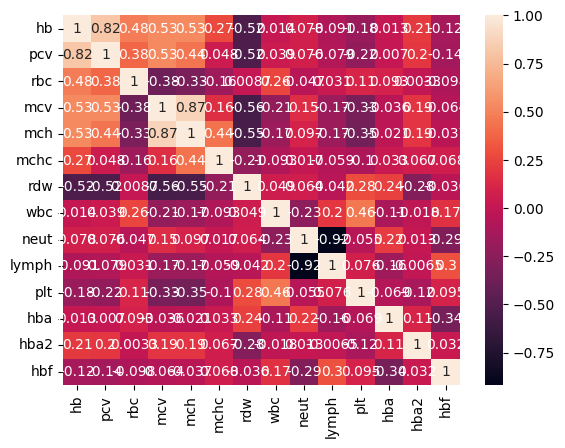

In [3]:
#heatmap of df
import seaborn as sns
import matplotlib.pyplot as plt
df_numeric = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

In [2]:
df.describe()

,hb,pcv,rbc,mcv,mch,mchc,rdw,wbc,neut,lymph,plt,hba,hba2,hbf
count,147.000000,147.00000,147.000000,147.000000,146.000000,147.00000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,11.543537,35.08886,5.099016,70.752564,22.861220,32.06579,15.346166,9.313314,45.551551,44.387285,341.641154,86.754188,2.555944,0.709710
std,1.569315,4.07620,0.618955,8.065548,3.297079,1.97060,2.430926,2.701163,12.505040,13.135881,102.964868,2.514777,0.339204,0.735023
min,7.600000,22.10000,2.410000,47.700000,11.100000,21.10000,11.500000,2.300000,6.200000,10.300000,138.000000,68.000000,0.300000,0.000000
25%,10.550000,33.05000,4.710000,65.400000,20.900000,31.15000,13.850000,7.560000,41.800000,37.000000,263.500000,86.100000,2.487143,0.300000
50%,11.500000,35.20000,5.090000,69.300000,22.400000,32.20000,15.000000,9.390000,45.000000,44.900000,332.279570,86.523291,2.588608,0.560909
75%,12.300000,36.95000,5.435000,77.150000,25.100000,33.00000,16.300000,10.985000,52.150000,47.700000,402.500000,87.400000,2.700000,0.769231
max,15.800000,48.40000,6.770000,91.700000,35.600000,40.80000,28.800000,20.400000,77.500000,87.000000,689.000000,98.400000,3.300000,4.800000


In [3]:
# normalize numeric values  
from sklearn.preprocessing import StandardScaler
import numpy as np
df = df.select_dtypes(include=[np.number])
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)




In [4]:
from scipy.stats import shapiro
df = df.select_dtypes(include=['float64', 'int64'])
normal_test_columns = df.columns
if len(df) > 2000:
    df = df.sample(2000)
shapiro_alpha_h0 = []
shapiro_twoalpha_h0 = []
for col in df[normal_test_columns]:
    stat, p = shapiro(df[col])
    # print(f'{col} -> Statistics={stat}, p={p}')
    alpha = 0.05
    if p > alpha:
        print(f'{col}  (fail to reject H0)', '\n')
        shapiro_alpha_h0.append(col)
    # else:
        # print(f'{col}  (reject H0)', '\n')
        # shapiro_alpha_h0.append('failed')

hb  (fail to reject H0) 

mcv  (fail to reject H0) 



In [5]:
from scipy.stats import pearsonr

#Pearson correlation test
pearson_alpha_h0 = []

for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            stat, p = pearsonr(df[col1], df[col2])
            # print(f'{col1} and {col2} -> Statistics={stat}, p={p}')
            alpha = alpha
            if p > alpha:
                print(f'{col1} and {col2} (fail to reject H0)', '\n')
                pearson_alpha_h0.append(col1)
                pearson_alpha_h0.append(col2)
            # else:
                # print(f'{col1} and {col2} (reject H0)', '\n')


hb and wbc (fail to reject H0) 

hb and neut (fail to reject H0) 

hb and lymph (fail to reject H0) 

hb and hba (fail to reject H0) 

hb and hbf (fail to reject H0) 

pcv and mchc (fail to reject H0) 

pcv and wbc (fail to reject H0) 

pcv and neut (fail to reject H0) 

pcv and lymph (fail to reject H0) 

pcv and hba (fail to reject H0) 

pcv and hbf (fail to reject H0) 

rbc and mchc (fail to reject H0) 

rbc and rdw (fail to reject H0) 

rbc and neut (fail to reject H0) 

rbc and lymph (fail to reject H0) 

rbc and plt (fail to reject H0) 

rbc and hba (fail to reject H0) 

rbc and hba2 (fail to reject H0) 

rbc and hbf (fail to reject H0) 

mcv and mchc (fail to reject H0) 

mcv and neut (fail to reject H0) 

mcv and hba (fail to reject H0) 

mcv and hbf (fail to reject H0) 

mchc and pcv (fail to reject H0) 

mchc and rbc (fail to reject H0) 

mchc and mcv (fail to reject H0) 

mchc and wbc (fail to reject H0) 

mchc and neut (fail to reject H0) 

mchc and lymph (fail to reject H0

In [4]:
df = pd.read_csv('creditcard.csv')

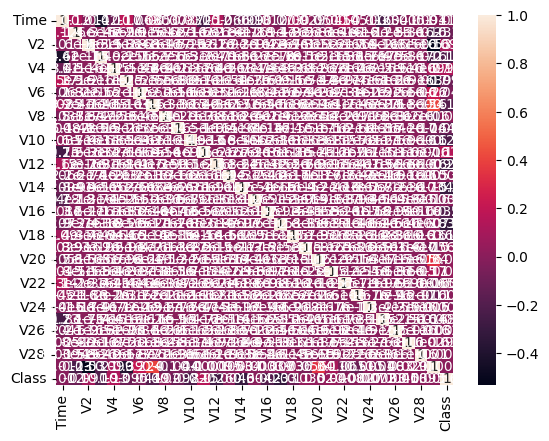

In [5]:
# normalize numeric values  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
#heatmap of df
import seaborn as sns
import matplotlib.pyplot as plt
df_numeric = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()


In [8]:
from scipy.stats import spearmanr

#Pearson correlation test
spearmen_alpha_h0 = []

for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:
            stat, p = spearmanr(df[col1], df[col2])
            # print(f'{col1} and {col2} -> Statistics={stat}, p={p}')
            alpha = alpha
            if p > alpha:
                print(f'{col1} and {col2} (fail to reject H0)', '\n')
                spearmen_alpha_h0.append(col1)
                spearmen_alpha_h0.append(col2)
            # else:
                # print(f'{col1} and {col2} (reject H0)', '\n')


Time and V16 (fail to reject H0) 

Time and V26 (fail to reject H0) 

V1 and V12 (fail to reject H0) 

V1 and V24 (fail to reject H0) 

V2 and V17 (fail to reject H0) 

V2 and V19 (fail to reject H0) 

V3 and V24 (fail to reject H0) 

V3 and Amount (fail to reject H0) 

V7 and V19 (fail to reject H0) 

V8 and V9 (fail to reject H0) 

V9 and V8 (fail to reject H0) 

V9 and V19 (fail to reject H0) 

V9 and V22 (fail to reject H0) 

V9 and V24 (fail to reject H0) 

V9 and V27 (fail to reject H0) 

V10 and V13 (fail to reject H0) 

V11 and V21 (fail to reject H0) 

V11 and V22 (fail to reject H0) 

V12 and V1 (fail to reject H0) 

V12 and V24 (fail to reject H0) 

V12 and V25 (fail to reject H0) 

V13 and V10 (fail to reject H0) 

V13 and V16 (fail to reject H0) 

V13 and V23 (fail to reject H0) 

V13 and V25 (fail to reject H0) 

V13 and Class (fail to reject H0) 

V15 and V22 (fail to reject H0) 

V15 and Class (fail to reject H0) 

V16 and Time (fail to reject H0) 

V16 and V13 (fail to

In [9]:
from scipy.stats import chi2_contingency
import pandas as pd

# Load dataset
df = pd.read_csv('creditcard.csv')

# Erase negative values
df = df.clip(lower=0)

# Check for 'target' column or create one
if 'target' not in df.columns:
    df['target'] = pd.qcut(df[df.columns[0]], q=2, labels=['Low', 'High'])

# Convert numerical columns to categorical by binning
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        try:
            df[col] = pd.qcut(df[col], q=2, labels=['Low', 'High'], duplicates='drop')
        except ValueError as e:
            print(f"Skipping column {col} due to binning error: {e}")
            continue

# Iterate over each column except 'target'
for col in df.columns:
    if col == 'target':
        continue
    
    # Create a contingency table comparing the feature and the target variable
    contingency_table = pd.crosstab(df[col], df['target'])
    
    # Apply Chi-Squared Test
    stat, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print results
    print(f'Column: {col}')
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')
    print('---')


Skipping column V4 due to binning error: Bin labels must be one fewer than the number of bin edges
Skipping column V5 due to binning error: Bin labels must be one fewer than the number of bin edges
Skipping column V6 due to binning error: Bin labels must be one fewer than the number of bin edges
Skipping column V9 due to binning error: Bin labels must be one fewer than the number of bin edges
Skipping column V10 due to binning error: Bin labels must be one fewer than the number of bin edges
Skipping column V11 due to binning error: Bin labels must be one fewer than the number of bin edges
Skipping column V13 due to binning error: Bin labels must be one fewer than the number of bin edges
Skipping column V17 due to binning error: Bin labels must be one fewer than the number of bin edges
Skipping column V18 due to binning error: Bin labels must be one fewer than the number of bin edges
Skipping column V20 due to binning error: Bin labels must be one fewer than the number of bin edges
Skip